## KDE Tutorial for One Dimension

This notebook goes through the steps of applying `sklearn.neighbors.KernelDensity` in a one dimensional example. The purpose of this is to demonstrate how the module works and see the differences between a regular histogram and the six available kernels through plots.

In [1]:
#Importing required modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

In [2]:
#Generating random numbers for our sample and its linspace
np.random.seed(1)
N = 100
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)), np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]
X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

(array([0.   , 0.012, 0.09 , 0.072, 0.012, 0.174, 0.222, 0.018, 0.   ]),
 array([-5.        , -3.33333333, -1.66666667,  0.        ,  1.66666667,
         3.33333333,  5.        ,  6.66666667,  8.33333333, 10.        ]),
 <a list of 9 Patch objects>)

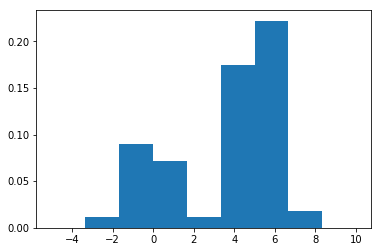

In [3]:
#Plotting histogram
bins = np.linspace(-5, 10, 10)
fig, ax = plt.subplots()
ax.hist(X[:, 0], bins=bins, normed=True)

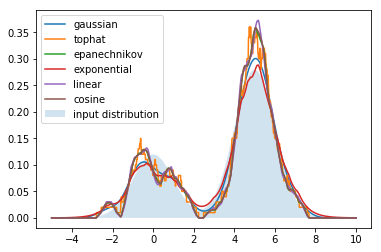

In [4]:
#Getting the true density for the input distribution
true_dens = (0.3 * norm(0, 1).pdf(X_plot[:, 0]) + 0.7 * norm(5, 1).pdf(X_plot[:, 0]))

#Plotting input distribution
fig, ax = plt.subplots()
ax.fill(X_plot[:, 0], true_dens, alpha=0.2, label='input distribution')

#Plotting a KDE for each available kernel
for kernel in ['gaussian', 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine']:
    kernel_string = str(kernel)
    kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(X)
    log_dens = kde.score_samples(X_plot)
    ax.plot(X_plot[:, 0], np.exp(log_dens), '-', label = kernel_string)  
ax.legend()

Text(-5,0.36,'Cosine')

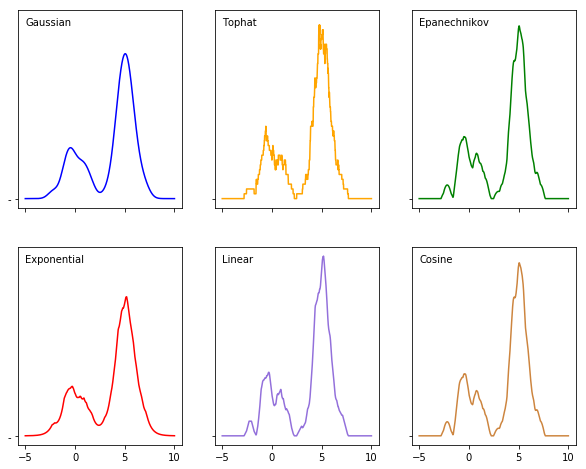

In [5]:
#Setting up 6 plots with same x and y axis (same axis as above)
fig, ax = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(10, 8))

#Gaussian
kde1 = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(X)
log_dens1 = kde1.score_samples(X_plot)
ax[0, 0].plot(X_plot[:, 0], np.exp(log_dens1), 'b-', label = 'gaussian')
ax[0, 0].text(-5, 0.36, "Gaussian")

#Tophat
kde2 = KernelDensity(kernel='tophat', bandwidth=0.5).fit(X)
log_dens2 = kde2.score_samples(X_plot)
ax[0, 1].plot(X_plot[:, 0], np.exp(log_dens2), 'orange', '-')
ax[0, 1].text(-5, 0.36, "Tophat")

#Epanechnikov
kde3 = KernelDensity(kernel='epanechnikov', bandwidth=0.5).fit(X)
log_dens3 = kde3.score_samples(X_plot)
ax[0, 2].plot(X_plot[:, 0], np.exp(log_dens3), 'g-')
ax[0, 2].text(-5, 0.36, "Epanechnikov")

#Exponential
kde4 = KernelDensity(kernel='exponential', bandwidth=0.5).fit(X)
log_dens4 = kde4.score_samples(X_plot)
ax[1, 0].plot(X_plot[:, 0], np.exp(log_dens4), 'r-')
ax[1, 0].text(-5, 0.36, "Exponential")

#Linear
kde5 = KernelDensity(kernel='linear', bandwidth=0.5).fit(X)
log_dens5 = kde5.score_samples(X_plot)
ax[1, 1].plot(X_plot[:, 0], np.exp(log_dens5), 'mediumpurple', '-')
ax[1, 1].text(-5, 0.36, "Linear")

#Cosine
kde6 = KernelDensity(kernel='cosine', bandwidth=0.5).fit(X)
log_dens6 = kde6.score_samples(X_plot)
ax[1, 2].plot(X_plot[:, 0], np.exp(log_dens6), 'peru', '-')
ax[1, 2].text(-5, 0.36, "Cosine")